In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load dataset
df = pd.read_csv("../data/raw/sentiment_dataset.csv", header=0)

# 2. Drop unwanted columns
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# 3. Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 4. Set Timestamp as index for time-series analysis
df = df.set_index('Timestamp')

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2023-01-15 12:30:00 to 2020-11-15 15:15:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Text          732 non-null    object 
 2   Sentiment     732 non-null    object 
 3   User          732 non-null    object 
 4   Platform      732 non-null    object 
 5   Hashtags      732 non-null    object 
 6   Retweets      732 non-null    float64
 7   Likes         732 non-null    float64
 8   Country       732 non-null    object 
 9   Year          732 non-null    int64  
 10  Month         732 non-null    int64  
 11  Day           732 non-null    int64  
 12  Hour          732 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 80.1+ KB
None
                     Unnamed: 0.1  \
Timestamp                           
2023-01-15 12:30:00             0   
2023-01-15 08:45:00             1 

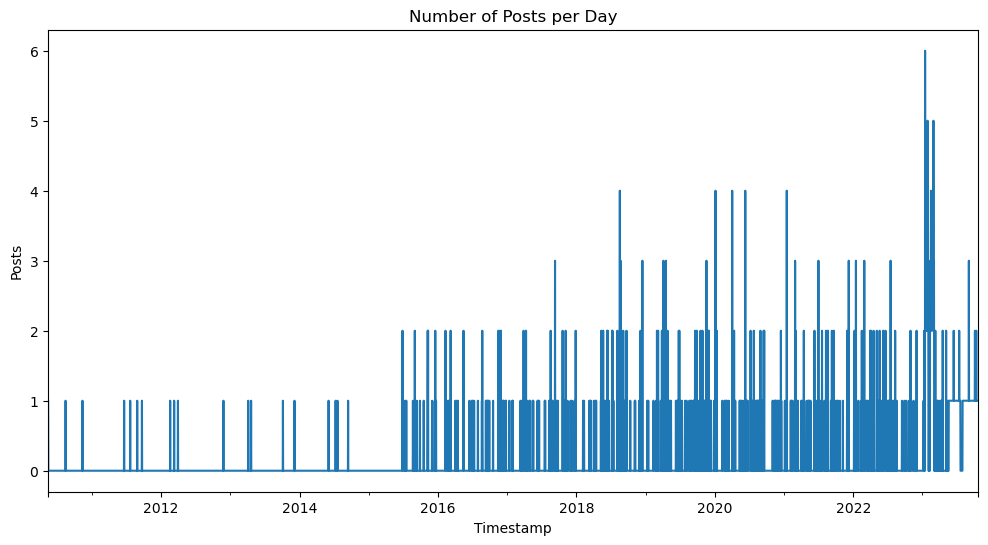

In [4]:
plt.figure(figsize=(12,6))
df.resample("D").size().plot()
plt.title("Number of Posts per Day")
plt.ylabel("Posts")
plt.show()


<Figure size 1200x600 with 0 Axes>

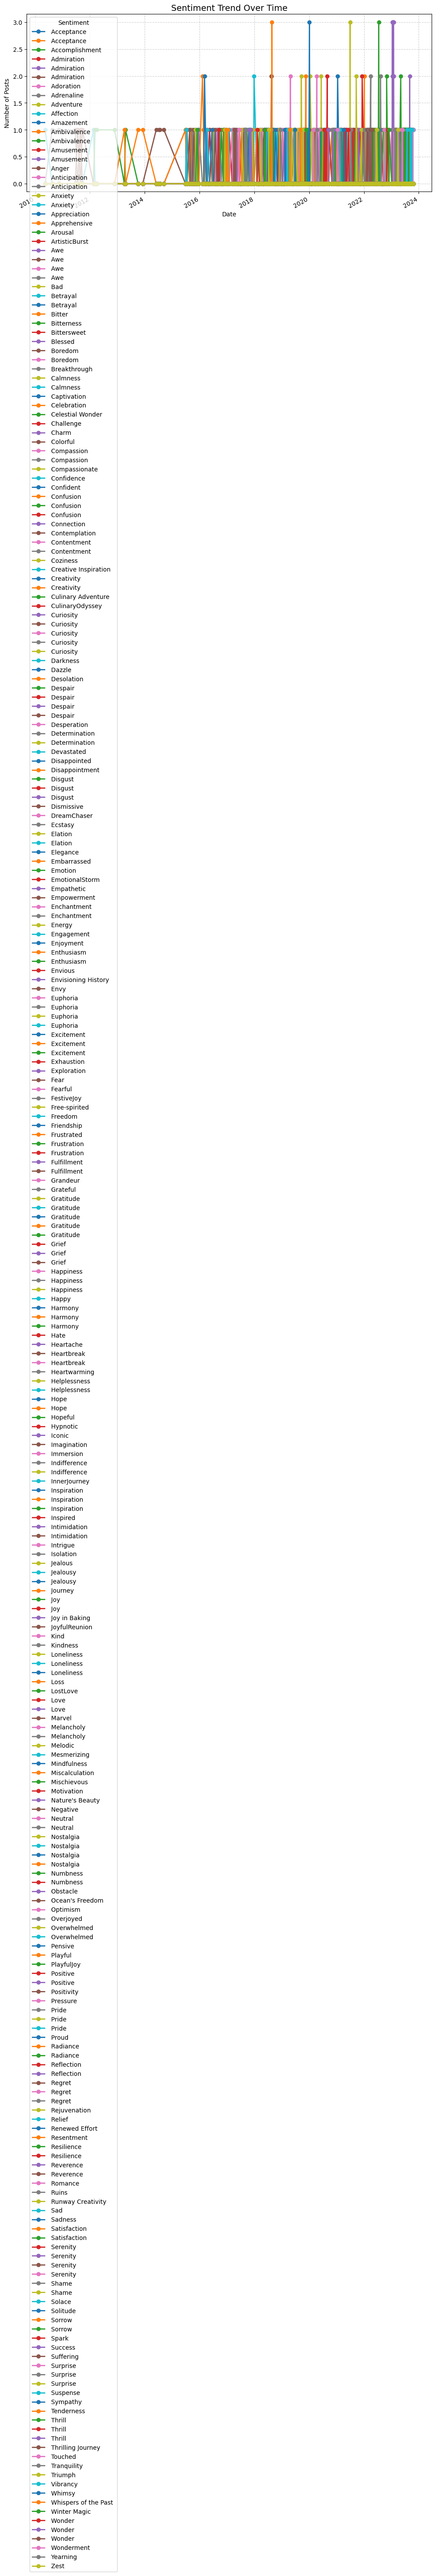

In [7]:
# Group by Date and Sentiment
sentiment_trend = df.groupby([df.index.date, 'Sentiment']).size().unstack(fill_value=0)

# Convert index back to datetime for better plotting
sentiment_trend.index = pd.to_datetime(sentiment_trend.index)

# Plot the trend
plt.figure(figsize=(12,6))
sentiment_trend.plot(kind="line", figsize=(12,6), linewidth=2, marker="o")
plt.title("Sentiment Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


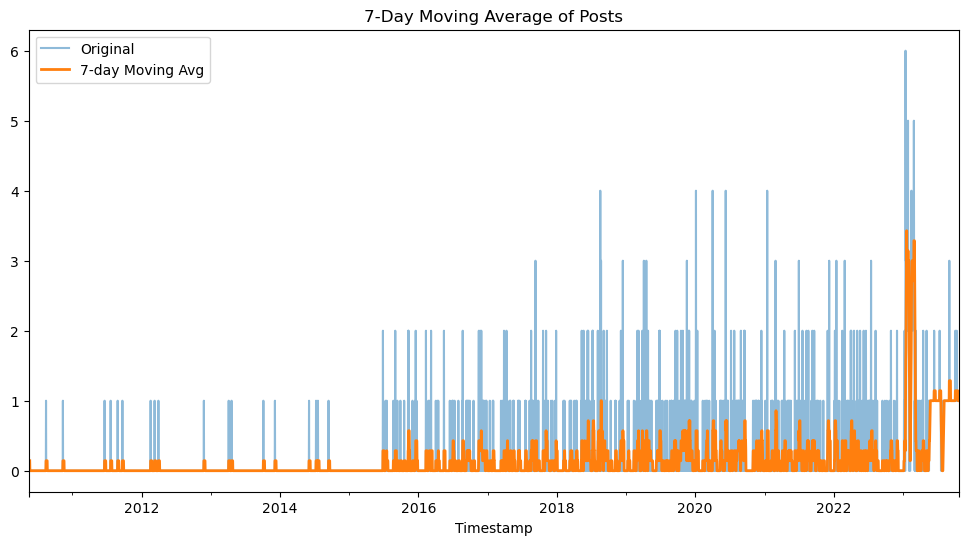

In [8]:
daily_counts = df.resample("D").size()

plt.figure(figsize=(12,6))
daily_counts.plot(label="Original", alpha=0.5)
daily_counts.rolling(window=7).mean().plot(label="7-day Moving Avg", linewidth=2)
plt.title("7-Day Moving Average of Posts")
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

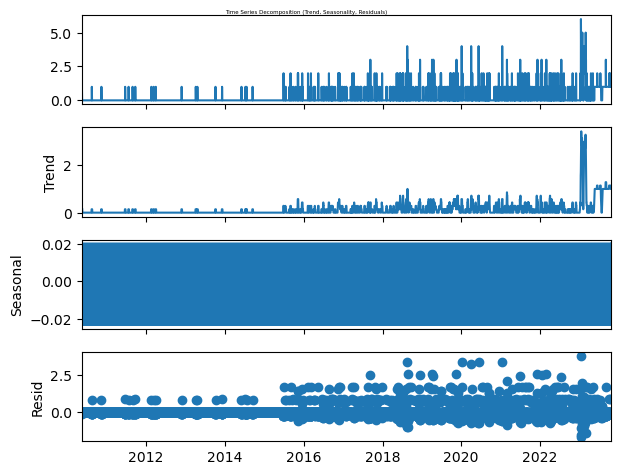

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure daily_counts is a proper time series (DatetimeIndex)
daily_counts = df.resample("D").size()

# Decompose (you can change 'additive' to 'multiplicative' if needed)
decomposition = seasonal_decompose(daily_counts, model="additive", period=7)

# Plot decomposition
plt.figure(figsize=(12,8))
decomposition.plot()
plt.suptitle("Time Series Decomposition (Trend, Seasonality, Residuals)", fontsize=4)
plt.show()


In [ ]:
#Nice — here’s a short, clear step-by-step explanation you can use for your video or notes. Each step has: what you did, why, and a one-line suggested narration you can read as voiceover.

#Import libraries & load CSV

#What: df = pd.read_csv("../data/raw/sentiment_dataset.csv")

#Why: bring data into pandas so we can analyze it.

#Say: “First I load the dataset into pandas to begin the analysis.”

#Remove unwanted index columns

#What: df = df.drop(columns=["Unnamed: 0"], errors="ignore")

#Why: some CSVs include extra index columns — drop them to clean the table.

#Say: “I remove any extra index columns to keep the table tidy.”

#Parse timestamps to datetime

#What: df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Why: convert the timestamp column to datetime so we can do time-based operations.

#Say: “Next I convert the Timestamp column into a datetime type for time-series work.”

#Set Timestamp as the DataFrame index

#What: df.set_index('Timestamp', inplace=True)

#Why: a DatetimeIndex makes resampling, rolling windows, and decomposition easy.

#Say: “I set the Timestamp as the index so we can resample and analyze over time.”

#Quick inspection

#What: df.info(); df.head()

#Why: confirm shapes, missing values, and column types before analysis.

#Say: “I check the dataset shape and types to ensure everything loaded correctly.”

#Compute daily post counts

#What: daily_counts = df.resample('D').size()

#Why: aggregate posts per day to form the basic time series for analysis.

#Say: “I aggregate posts by day to create the primary time series.”

#Plot daily counts (original time series)

#What: daily_counts.plot() plus labels/title.

#Why: visualize overall activity, spot spikes, gaps, and trends.

#Say: “Here’s the raw daily post count — this shows overall volume and spikes.”

#Smooth with moving average

#What: daily_counts.rolling(window=7).mean() and plot with original.

#Why: the rolling mean (e.g., 7-day) reveals the underlying trend by smoothing noise.

#Say: “I add a 7-day moving average to highlight the trend and reduce noise.”

#Sentiment trend over time (positive/neutral/negative)

#What: sentiment_trend = df.groupby([df.index.date,'Sentiment']).size().unstack(fill_value=0) then plot.

#Why: compare how each sentiment class changes over time.

#Say: “I plot positive, negative, and neutral counts to compare sentiment trends.”

#Decompose the time series (trend / seasonality / residuals)

#What: from statsmodels.tsa.seasonal import seasonal_decompose then seasonal_decompose(daily_counts, model='additive', period=7) (or period=30 for monthly patterns).

#Why: decomposition separates long-term trend, repeating seasonal pattern, and irregular residuals.

#Say: “I decompose the series into trend, seasonal pattern, and residuals to understand components.”

#(Optional) Decompose per sentiment

#What: repeat steps 6–10 for df[df['Sentiment']=='Positive'] etc.

#Why: see if different sentiments have different seasonal patterns (e.g., weekends).

#Say: “I repeat the decomposition for each sentiment class to compare their patterns.”

#Interpret results & save visuals

#What: examine plots and note findings; plt.savefig("filename.png") to save.

#Why: create deliverables and write down key insights (trends, seasonality, spikes).

#Say: “I save plots and record insights: rising/falling trends, weekly patterns, and anomalies.”

#Next recommended steps (brief)

#What: do word-clouds, hashtag analysis, platform comparison, or sentiment decomposition per platform/date.

#Why: deeper insights and richer story for your report or video.

#Say: “Next I can analyze common words, hashtags, and differences across platforms.”